# Name: DOMINGO, Mariedel O.
## Section: 2ECE-A

### Exploratory Data Analysis on Spotify 2023 Dataset

##### Overview of DataSet

In [3]:
#Utilizing the following import conventions to access the various libraries that will be used throughout the program.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To enable the code to read the dataset, using encoding='latin-1' will help load the .csv file, and this function will store the data in the variable df.
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#### Data Preprocessing

In [5]:
# Using dtypes function from pandas library, this will help indicate what are the data type stored in each column.
data_types = df.dtypes
print("Data Types of Each Column:\n", data_types)

# By employing the .isnull() function, this code checks for missing values, and then the .sum() function totals all the number of missing values in each column. The outcome is stored in the variable missing_values.
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# This function displays the total missing values for each column.
total_missing = missing_values.sum()
print(f"\nTotal Missing Values in the Dataset: {total_missing}")

Data Types of Each Column:
 track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Missing Values in Each Column:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlist

##### Basic Descriptive Statistics

In [20]:
# Given that the data type of the streams is an object, we can convert it to numeric using pd.to_numeric. This allows us to calculate the mean, median, and standard deviation using the .mean() function.
mean_streams = pd.to_numeric(df['streams'], errors='coerce').mean()
median_streams = pd.to_numeric(df['streams'], errors='coerce').median()
std_streams = pd.to_numeric(df['streams'], errors='coerce').std()

#This function displays the calculated mean, median, and standard deviation from the previous function.
print("Descriptive statistics for streams")
print("Mean: ", mean_streams)
print("Median: ", median_streams)
print("Standard deviation: ", std_streams)

Descriptive statistics for streams
Mean:  514137424.93907565
Median:  290530915.0
Standard deviation:  566856949.0388832


##### Table above shows that the average  is higher than the median, indicating that most tracks have fewer streams, but a few tracks have very high streams. On the otherhand, the standard deviation shows that the streams vary a lot between different tracks.

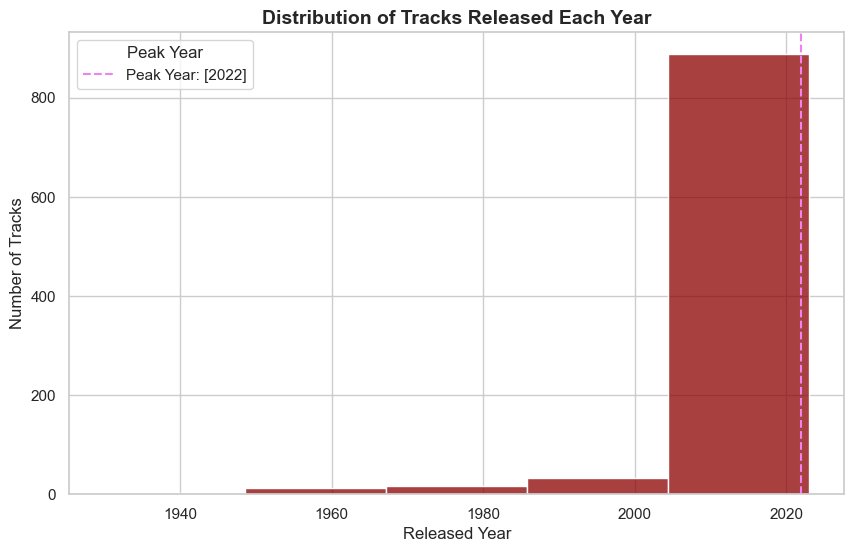

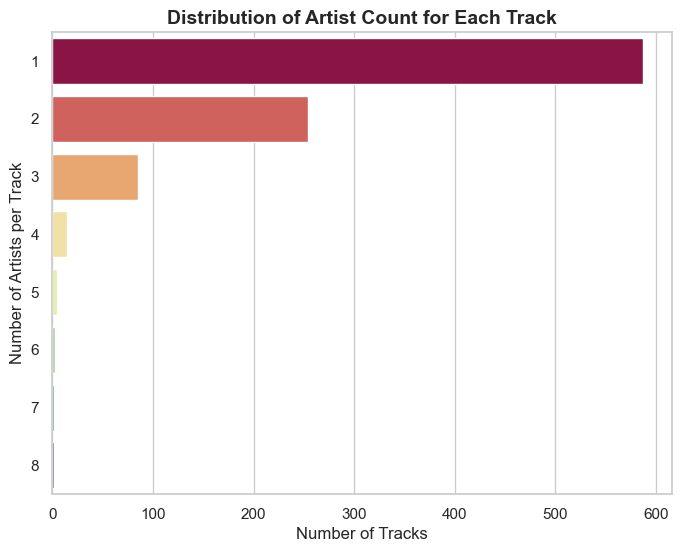

In [24]:
# This function provides a visual representation of how distribution of tracks were released each year.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df["released_year"], bins=5, color="darkred")
plt.xlabel("Released Year", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.title("Distribution of Tracks Released Each Year", fontsize=14, fontweight="bold")
peak_year = df["released_year"].value_counts()
max_count = peak_year.max()
peak_year = peak_year[peak_year == max_count].index.tolist()  # List of years with peak values
plt.axvline(x=peak_year, color='violet', linestyle='--', label=f'Peak Year: {peak_year}')


plt.legend(title="Peak Year")
plt.show()

##### As seen in the graph, the music industry began slowly in the 1960s, gradually picking up through the 2000s, but the peak year came in 2022, during the pandemic, when most people were staying at home.

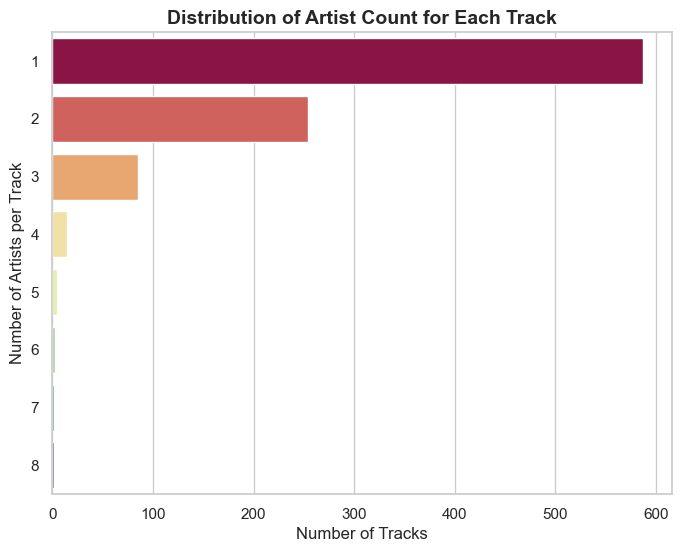

In [27]:
# This function depicts the number of artists that contribute to each track graphically.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(y="artist_count", hue="artist_count", data=df, palette="Spectral", dodge=False, legend=False)
plt.ylabel("Number of Artists per Track", fontsize=12)
plt.xlabel("Number of Tracks", fontsize=12)
plt.title("Distribution of Artist Count for Each Track", fontsize=14, fontweight="bold")
plt.show()

##### The visual shows that the majority of released tracks were created by solo artists, with fewer collaborations.

##### Top Performers

In [33]:
# Since the 'streams' column is an object data type, it is necessary to convert it to numeric in order to use the nlargest function, which will be utilized to provide the top 5 most streamed tracks.
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
most_streamed_tracks = df[['track_name', 'streams']].nlargest(5, 'streams')

print("Top 5 Most Streamed Tracks:\n", most_streamed_tracks )


Top 5 Most Streamed Tracks:
                                         track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


##### The table highlights the top 5 most-streamed tracks on Spotify, revealing listener preferences, with "Blinding Lights" by The Weeknd taking the lead as the most-streamed track.

In [36]:
# By using the .value_counts() function, the code counts the frequency of each artist in the 'artist(s)_name' column.
# Then, by applying the .head(5) function, it gets the top 5 most frequently appearing artists based on the number of tracks.
top_artists = df['artist(s)_name'].value_counts().head(5)
print("\nTop 5 most Frequent Artists by Number of Tracks:\n", top_artists)


Top 5 most Frequent Artists by Number of Tracks:
 artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


##### Table 4.1 reveals the collaborative dynamics within the music industry, highlighting the frequency of artist pairings and group collaborations. While The Weeknd has the most-streamed track, Taylor Swift leads as the top artist with 34 collaborations, closely followed by The Weeknd with 22 collaborations.

##### Temporal Trends in Music Releases

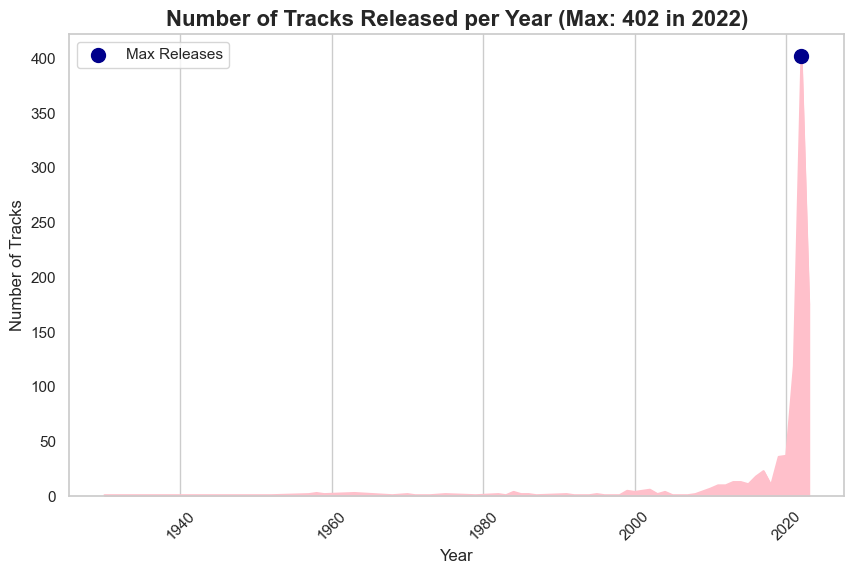

In [49]:
# Stored in the variable releases_per_year, the groupby() function groups the dataset that is in the values in the 'released_year' column.
# After grouping the values, using the .size() function it wil helps count the number of tracks released in each year.
releases_per_year = df.groupby('released_year').size()

# To analyze trends, the plt.figure() function is used to create a plot based on the values stored in the releases_per_year variable.
plt.figure(figsize=(10, 6))
releases_per_year.plot(kind='area', color='pink', alpha=1)

# Utilizing the .idxmax() function, this will find the year with the highest value in the graph.
max_year = releases_per_year.idxmax()  

# By using the .max() function, this will identify the highest value plotted in the graph.
max_value = releases_per_year.max() 

# This function will display the maximum values along with the corresponding year.
plt.scatter(max_year, max_value, color='darkblue', s=100, zorder=5, label='Max Releases')

# On the other hand, the following function helps the user understand the graph better by adding titles, x-labels, and y-labels.
plt.title('Number of Tracks Released per Year (Max: ' + str(max_value) + ' in ' + str(max_year) + ')', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Displays the graph along with its legend.
plt.legend()
plt.show()

##### As we observed earlier, 2022 marked the peak of music releases. Teh Figure illustrates the number of tracks released each year, and it’s clear that 2022 stood out with a remarkable 402 tracks being released during that year.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17212\1447283343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=releases_per_month.index, y=releases_per_month.values, palette="rainbow")


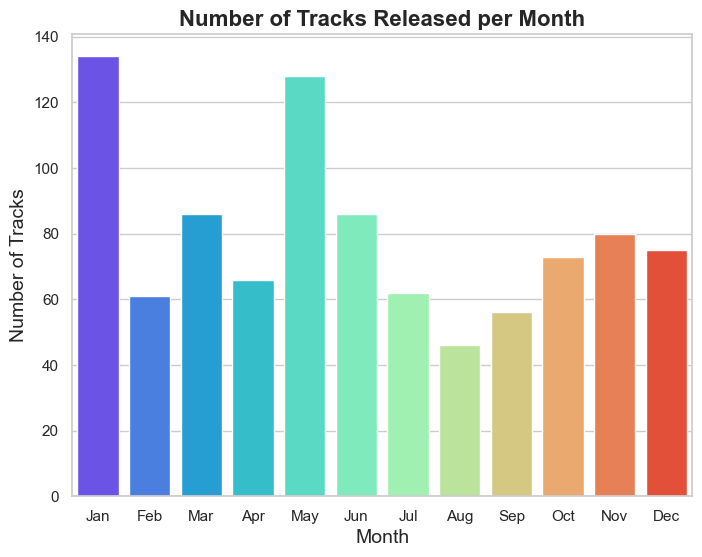

In [39]:
# Similar to the previous code, the .value_counts() function is used to count the number of tracks released per month
# Then, by utilizing .sort_index(), it sorts the values by their index.
releases_per_month = df['released_month'].value_counts().sort_index()

# This function improves the user's comprehension of the graph by including titles, x-axis labels, and y-axis labels.
plt.figure(figsize=(8, 6))
sns.barplot(x=releases_per_month.index, y=releases_per_month.values, palette="rainbow")
plt.title('Number of Tracks Released per Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Displays the gathered values on the graph
plt.show()

##### On the other hand, when looking at the monthly release patterns, January and May stand out as the peak months, showing a significant surge in popular music during these times.

##### Musical Attributes and Popularity

Correlation among Streams:
 streams           1.000000
bpm              -0.002438
danceability_%   -0.105457
energy_%         -0.026051
valence_%        -0.040831
acousticness_%   -0.004485
Name: streams, dtype: float64 

Correlation among Streams using Visual Representation



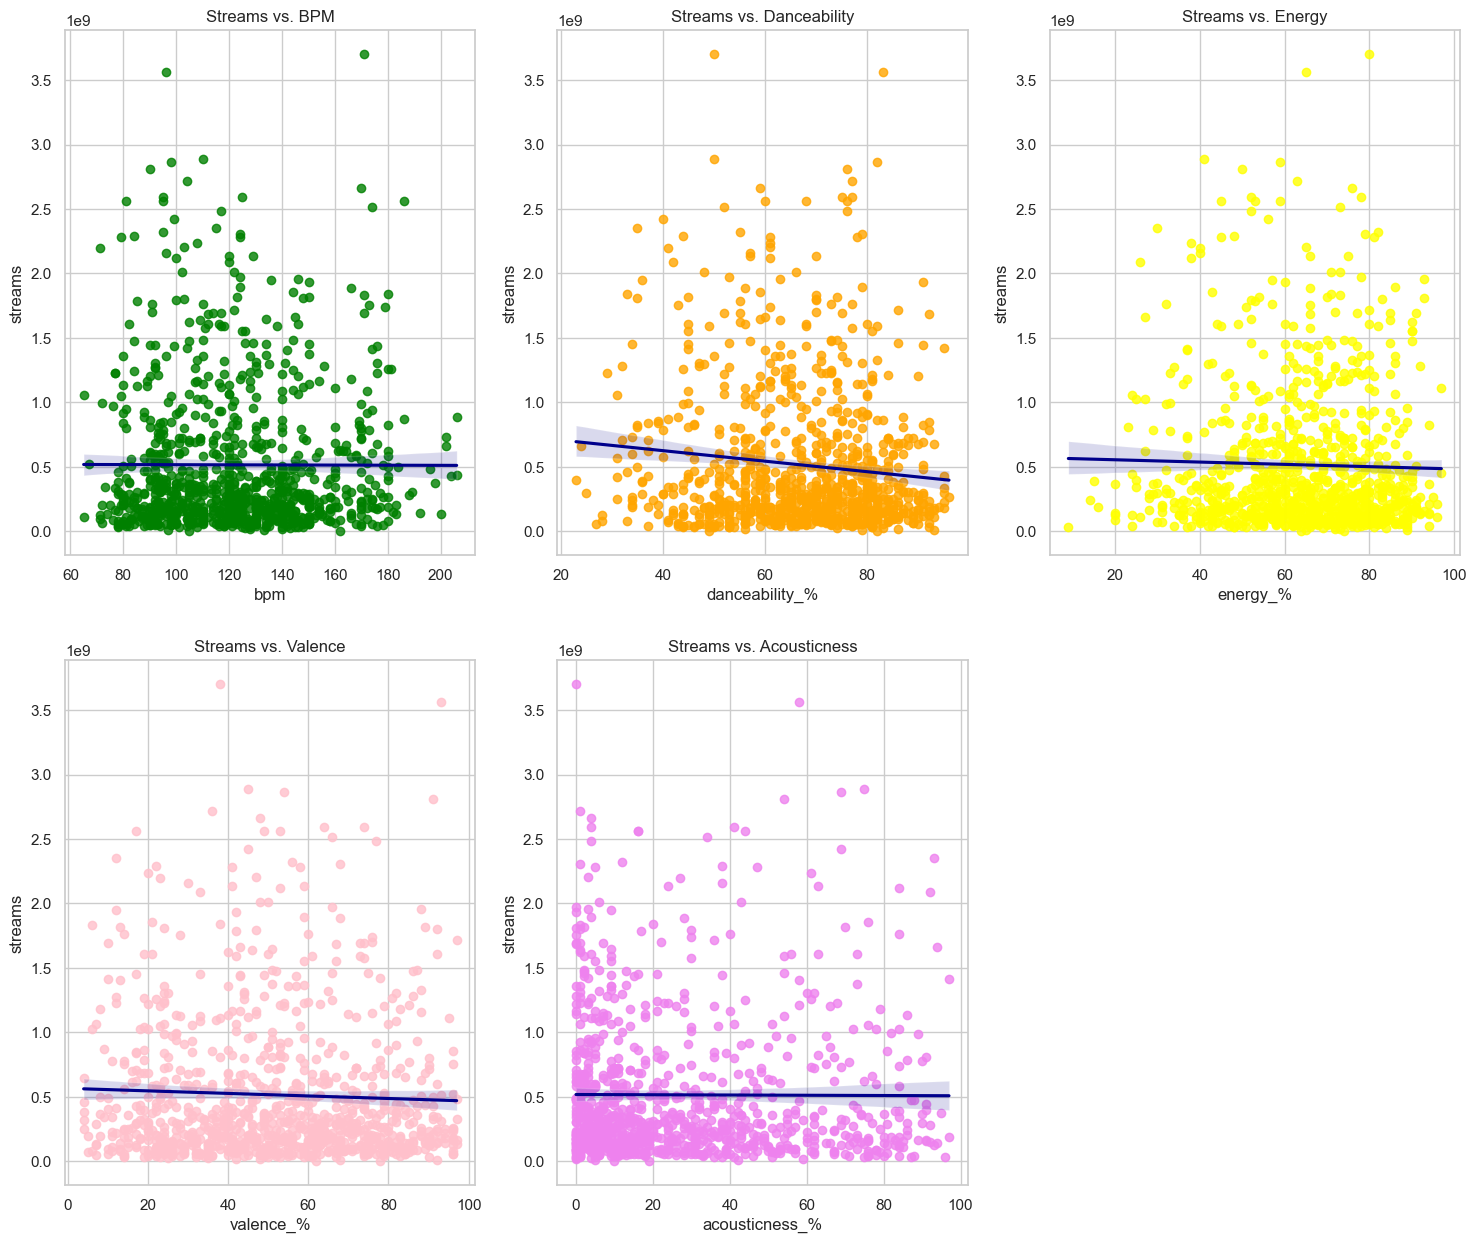

In [20]:
# Stored in the correlation_with_streams variable, the .corr() function helps to find the correlation between the selected columns.
correlation_with_streams = df[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%',	'acousticness_%']].corr()
print("Correlation among Streams:\n", correlation_with_streams['streams'], "\n")

print("Correlation among Streams using Visual Representation\n")
# Aside from calculating the correlation, graphing the values aids in analyzing the relationship between them. 
# Therefore, by using the plt function it provides visual representation of these values.
plt.figure(figsize=(18, 15))

# This graph shows the correlation between Streams and BPM.
plt.subplot(2, 3, 1)
sns.regplot(x='bpm', y='streams', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'darkblue'})
plt.title('Streams vs. BPM')

# This function illustrates the correlation between Streams and Danceability.
plt.subplot(2, 3, 2)
sns.regplot(x='danceability_%', y='streams', data=df, scatter_kws={'color': 'orange'}, line_kws={'color': 'darkblue'})
plt.title('Streams vs. Danceability')

# Provides a visual representation of the relationship between Streams and Energy.
plt.subplot(2, 3, 3)
sns.regplot(x='energy_%', y='streams', data=df, scatter_kws={'color': 'yellow'}, line_kws={'color': 'darkblue'})
plt.title('Streams vs. Energy')

# The graph depicts the connection between Streams and Valence.
plt.subplot(2, 3, 4)
sns.regplot(x='valence_%', y='streams', data=df, scatter_kws={'color': 'pink'}, line_kws={'color': 'darkblue'})
plt.title('Streams vs. Valence')

# Illustrates the correlation among Streams and Acousticness
plt.subplot(2, 3, 5)
sns.regplot(x='acousticness_%', y='streams', data=df, scatter_kws={'color': 'violet'}, line_kws={'color': 'darkblue'})
plt.title('Streams vs. Acousticness')

# Displays the Scatter Plot
plt.show()

##### The calculated correlation between streams and musical attributes reveals mostly negative values. Additionally, the visual representation shows that all the regression lines have a negative slope, indicating that these attributes don't significantly influence track popularity

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08



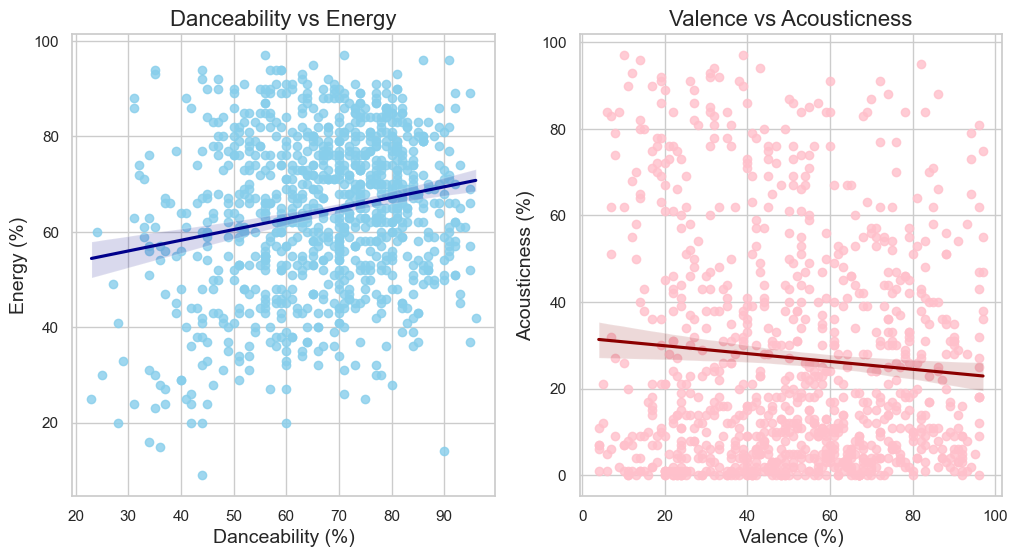

In [22]:
# Similarly, the .corr() function calculates the correlation between the selected columns.
# Correlation between Danceability and Energy.
correlation_dance_energy = df['danceability_%'].corr(df['energy_%'])
print(f"Correlation between Danceability and Energy: {correlation_dance_energy:.2f}")

# Relationship between Valence and Acousticness
correlation_valence_acousticness = df['valence_%'].corr(df['acousticness_%'])
print(f"Correlation between Valence and Acousticness: {correlation_valence_acousticness:.2f}\n")

#To better analyze the relationships between the selected columns,by utlizing the plt function this creates visual representation of their correlations.
plt.figure(figsize=(12, 6))

# Scatter plot for Danceability and Energy.
plt.subplot(1, 2, 1) 
sns.regplot(x='danceability_%', y='energy_%', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'darkblue'})
plt.title('Danceability vs Energy', fontsize=16)
plt.xlabel('Danceability (%)', fontsize=14)
plt.ylabel('Energy (%)', fontsize=14)

# Scatter plot for Valence and Acousticness.
plt.subplot(1, 2, 2)
sns.regplot(x='valence_%', y='acousticness_%', data=df, scatter_kws={'color': 'pink'}, line_kws={'color': 'darkred'})
plt.title('Valence vs Acousticness', fontsize=16)
plt.xlabel('Valence (%)', fontsize=14)
plt.ylabel('Acousticness (%)', fontsize=14)

# Displays the graph.
plt.show()

##### The calculated correlation between danceability and energy shows a positive result, and the visual representation further supports this with a positive slope. This suggests that these two elements are interconnected, meaning that the more danceable a track is, the more energy it requires. On the otherhand, the valence and acousticness of a song contribute to its overall mood. However, the calculated correlation between these two attributes reveals a negative result and slope, suggesting that they are not correlated with each other. This indicates that a track can have one of these elements without necessarily having the other.

##### Platform Popularity

In [58]:
# By utilizing the .sum() function, it sums the values of the selected columns, which helps with comparison.
popular_tracks = df[['in_apple_playlists', 'in_spotify_playlists','in_spotify_charts',  'in_deezer_playlists', 'in_deezer_charts']].sum()
print("The Number of Tracks in each Platform:\n", popular_tracks)

The Number of Tracks in each Platform:
 in_apple_playlists                                                  64625
in_spotify_playlists                                              4955719
in_spotify_charts                                                   11445
in_deezer_playlists     4558911258788433048665421745182863161789554231...
in_deezer_charts                                                     2541
dtype: object


##### By examining the table, we can clearly identify a significant trend: Spotify playlists feature the most popular songs across platforms, with a popularity count of 4,955,719.

In [ ]:
# Sum the values for each platform
popular_tracks = df.sum()

# Create a DataFrame for plotting
platforms = pd.DataFrame({
    'Platform': popular_tracks.index,
    'Track Count': popular_tracks.values
})

# This function adjusts the size and adds design elements to the graph.
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = sns.color_palette(["pink", "violet", "lightgreen", "orangered", "blue"])
graph = sns.barplot(data=platforms, x='Platform', y='Track Count', palette=palette, edgecolor='black')

#The following functions are used to add labels to the graph.
plt.xlabel('Platform', fontsize=14, fontweight='bold')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold')
plt.title('The track count across different platforms.', fontsize=16, fontweight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### Above, you can see a visual representation that highlights the significant differences in popularity across each platform.

##### Advanced Analysis

Distribution of Tracks by Key and Mode (Major vs. Minor):
    key   mode       streams
0    A  Major  4.019603e+08
1    A  Minor  4.173906e+08
2   A#  Major  6.275336e+08
3   A#  Minor  4.849231e+08
4    B  Major  4.363336e+08
5    B  Minor  5.825110e+08
6   C#  Major  6.285883e+08
7   C#  Minor  5.665252e+08
8    D  Major  5.720180e+08
9    D  Minor  3.425588e+08
10  D#  Major  6.819623e+08
11  D#  Minor  4.793647e+08
12   E  Major  7.605963e+08
13   E  Minor  5.083264e+08
14   F  Major  5.279311e+08
15   F  Minor  4.102836e+08
16  F#  Major  4.175450e+08
17  F#  Minor  5.954921e+08
18   G  Major  4.929813e+08
19   G  Minor  3.637593e+08
20  G#  Major  5.458044e+08
21  G#  Minor  3.219036e+08 



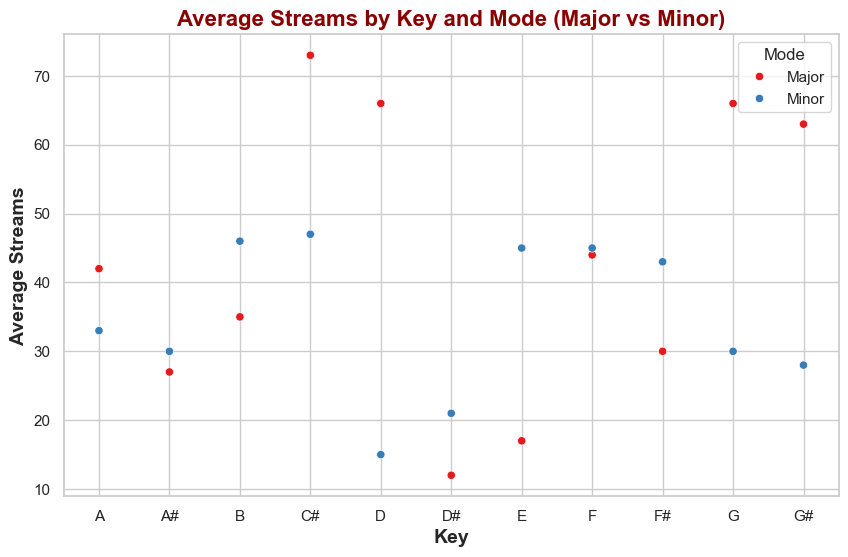

In [77]:
# Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
streams_same_key = df.groupby(['key', 'mode'])['streams'].mean().reset_index()
print("Distribution of Tracks by Key and Mode (Major vs. Minor):\n", streams_same_key, "\n")

# Since the data type of the streams is an object, using .to_numeric function to convert 'streams' column to numeric.
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')  

# Calculates the average among tracks with the same key or mode (Major vs. Minor).
streams_same_key = df.groupby(['key', 'mode']).size().reset_index(name='Count')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a scatter plot with different colors for each mode
sns.scatterplot(data=streams_same_key, x='key', y='Count', hue='mode', palette='Set1')

# Add labels and title
plt.xlabel('Key', fontsize=14, fontweight='bold')
plt.ylabel('Average Streams', fontsize=14, fontweight='bold')
plt.title('Average Streams by Key and Mode (Major vs Minor)', fontsize=16, fontweight='bold', color='darkred')

# Display the plot
plt.legend(title='Mode')
plt.show()

##### The table and figure above illustrate the distribution of tracks by key and mode. A clear pattern emerges, showing that C# has the highest number of tracks, while D# is the least used key and mode

Most Frequently Appearing Artists:
                      in_apple_playlists  in_spotify_playlists  \
artist(s)_name                                                  
The Weeknd                         1677                144053   
Taylor Swift                       1796                132974   
Ed Sheeran                         1448                128758   
Harry Styles                       1741                110026   
Eminem                              475                 87331   
Arctic Monkeys                      241                 84016   
Coldplay                            381                 75716   
Avicii                              407                 68241   
Dr. Dre, Snoop Dogg                 283                 65728   
Adele                               646                 65049   

                     in_spotify_charts  in_deezer_playlists  in_deezer_charts  \
artist(s)_name                                                                  
The Weeknd           

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4568\289297253.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='Total Appearances', y=top_artists_playlists.index, palette="viridis", edgecolor='black')


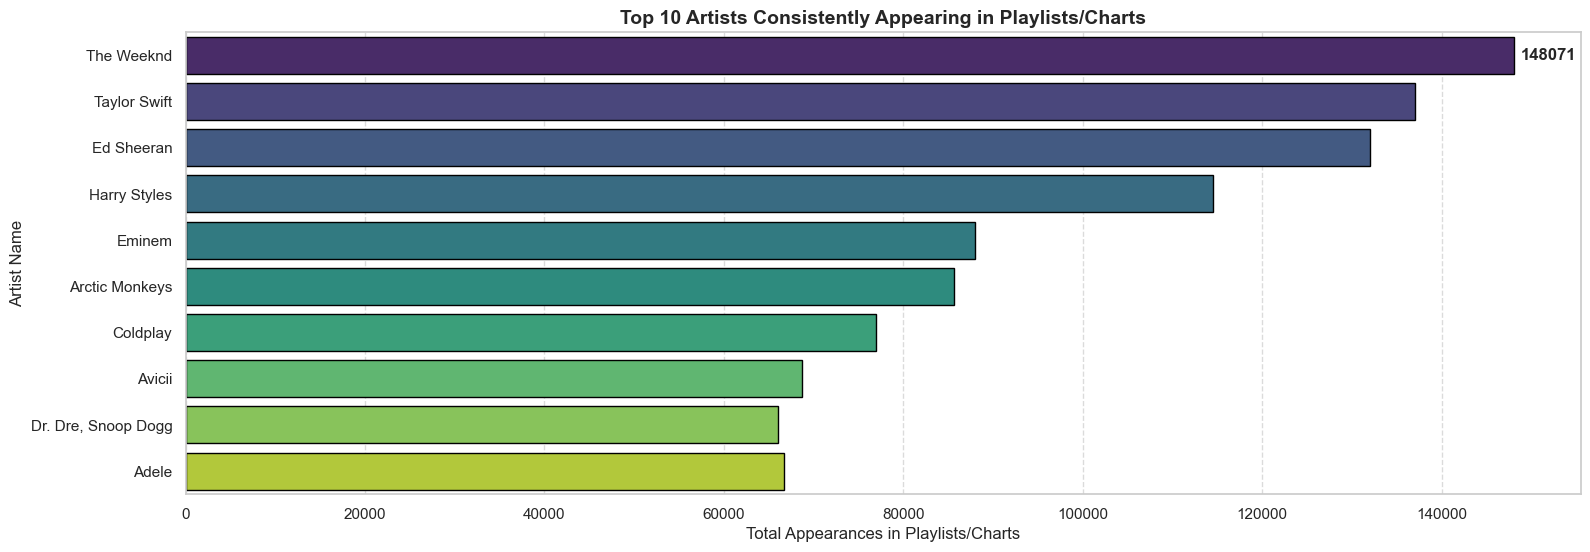

In [38]:
# Using .sum() function it sums up how many times the artist consistently appear in more playlists/charts.
top_artists = df.groupby('artist(s)_name')[['in_apple_playlists', 'in_spotify_playlists','in_spotify_charts','in_deezer_playlists','in_deezer_charts']].sum()
top_artists = top_artists.sort_values(by='in_spotify_playlists', ascending=False).head(10)
print("Most Frequently Appearing Artists:\n", top_artists_playlists)

# Sums the total number of appearances for each artist across all platforms.
top_artists['Total Appearances'] = top_artists.sum(axis=1)

# Set the overall design of the graph
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.barplot(data=top_artists, x='Total Appearances', y=top_artists_playlists.index, palette="viridis", edgecolor='black')
plt.bar_label(plt.gca().containers[0], fontsize=12, fontweight='bold', padding=5)

# Adds labels to the gaph.
plt.title('Top 10 Artists Consistently Appearing in Playlists/Charts', fontsize=14, fontweight='bold')
plt.xlabel('Total Appearances in Playlists/Charts', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()